In [1]:
include("../ntl.jl")
import Random

using LinearAlgebra
Random.seed!(3)

dirichlet_scale = ones(Float64, 10)
data_parameters = Ntl.Models.MultinomialParameters(10, dirichlet_scale)

psi_prior = Vector{Float64}([1, 1])
phi_prior = Vector{Float64}([1, 1])
geometric_arrival = Ntl.Models.GeometricArrivals(prior=phi_prior, sample_parameter_posterior=true)
ntl_cluster_parameters = Ntl.Models.NtlParameters(psi_prior, geometric_arrival)

mixture_model = Ntl.Models.Mixture(ntl_cluster_parameters, data_parameters)
n = 5
mixture = Ntl.Generate.generate(mixture_model, n=n)
data = Matrix(transpose(Matrix(mixture[:, 2:end])))
training_data = data[:, 1:n]
true_clustering = mixture[:, 1]
true_number_of_clusters = length(unique(true_clustering))

2

In [2]:
ntl_cluster_parameters = Ntl.Models.NtlParameters(psi_prior, geometric_arrival)
gibbs_sampler = Ntl.Samplers.GibbsSampler(num_iterations=1000000, num_burn_in=100000, skip=1,
                                          assignment_types=["all same cluster"])
gibbs_output = Ntl.Fitter.fit(training_data, mixture_model, gibbs_sampler)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:30:28


Dict{String, Array} with 3 entries:
  "assignments"       => [1 1 … 1 1; 2 2 … 2 2; … ; 4 2 … 2 2; 5 1 … 5 1]
  "arrival posterior" => [0.864335; 0.132011; … ; 0.612651; 0.32223]
  "log likelihood"    => [-115.925; -115.404; … ; -116.986; -115.826]

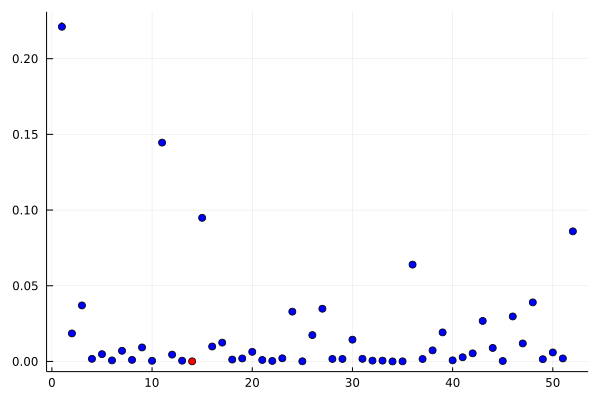

In [3]:
Ntl.Plot.plot_clustering_posterior_probability_validation(gibbs_output["assignments"][:, :, 1], data, mixture_model)

In [4]:
metropolis_hastings_sampler = Ntl.Samplers.MetropolisHastingsSampler(num_iterations=1000000, num_burn_in=100000, proposal_radius=100, skip=1, adaptive=false,
                                                                     assignment_types=["random"])
mcmc_output = Ntl.Fitter.fit(training_data, mixture_model, metropolis_hastings_sampler) 

Progress: 100%|█████████████████████████████████████████| Time: 0:01:03


Dict{String, Array} with 3 entries:
  "assignments"       => [1 1 … 1 1; 2 2 … 1 1; … ; 4 4 … 1 1; 1 1 … 1 1]
  "arrival posterior" => [0.680948; 0.484161; … ; 0.323262; 0.0637802]
  "log likelihood"    => [-116.714; -116.714; … ; -114.98; -114.98]

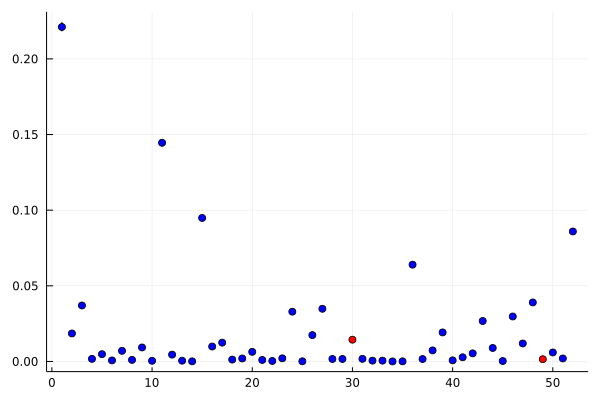

In [5]:
Ntl.Plot.plot_clustering_posterior_probability_validation(mcmc_output["assignments"][:, :, 1], data, mixture_model)